In [1]:
import sys
import sklearn
import matplotlib 
import numpy as np

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 9s 1us/step


In [4]:
print("Training Data: {}".format(x_train.shape))
print("Training Labels: {}".format(y_train.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)


In [5]:
print("Testing Data: {}".format(x_test.shape))
print("Testing Labels: {}".format(y_test.shape))

Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [6]:
import matplotlib.pyplot as plt

# python magic funcition
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


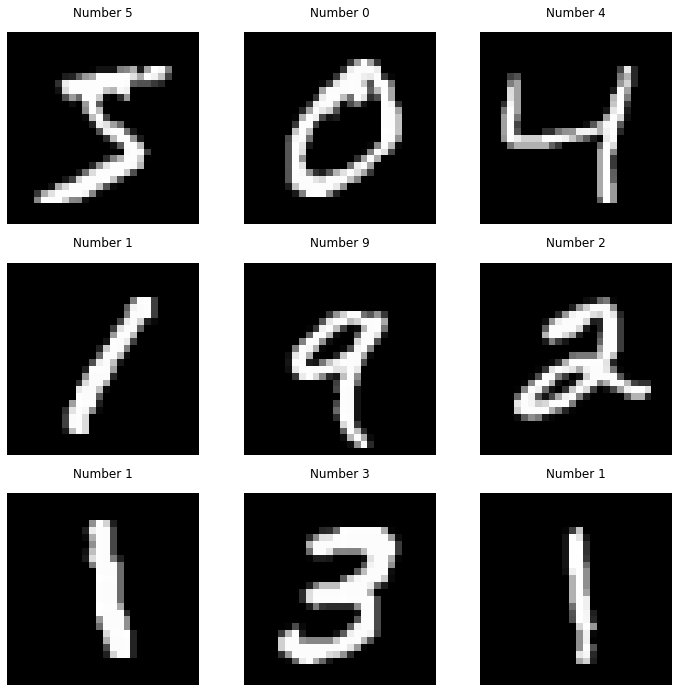

In [23]:
# Create a figgure with 2*3 subplot with matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# Loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title("Number {}".format(y_train[i]))
    
# display figure
fig.show()

In [ ]:
# Preprocessing the images

# convert each image to 1-dimensional array of length 28*28
X = x_train.reshape(len(x_train), -1)
Y = y_train

# Normalize the data to 0 - 1
X = X.astype(float) / 255.
print(X.shape)
print(X[0].shape)

In [18]:
from sklearn.cluster import MiniBatchKMeans

n_digit = len(np.unique(y_test))
print(n_digit)

# Initialize the k-means model
kmeans = MiniBatchKMeans(n_clusters= n_digit)

# Fit the model to trainig data
kmeans.fit(X)

10


MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=10, n_init=3, random_state=None,
                reassignment_ratio=0.01, tol=0.0, verbose=0)

In [20]:
kmeans.labels_[:20]

array([4, 3, 6, 7, 2, 0, 1, 4, 1, 9, 4, 1, 4, 5, 1, 9, 0, 7, 5, 9])

In [57]:
def infer_cluster_labels(kmeans, actual_labels):
    """
    Associate most probable label with each cluster in kMeans Model
    returns : Dictionary of cluster assigned to each label
    """
    
    inferred_labels = {}
    #print(kmeans.n_clusters)
    
    #print("Actual Labels : ",actual_labels[:20])
    
    for i in range(kmeans.n_clusters):
        
        #print("i: ",i)
        
        # Find the index of points in cluster
        labels = []
        index = np.where(kmeans.labels_ == i)
        
        #print(index)
        
        # append actual labels for each point in cluster
        labels.append(actual_labels[index])
        
        #print(actual_labels[index])
        
        # Most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))
            
        #print(counts)
            
            
        # Assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels:
            # Append the new number to existing array at this key
            inferred_labels[np.argmax(counts)].append(i)
        else:
            # Create a new array for this key
            inferred_labels[np.argmax(counts)] = [i]
            
        #print(labels)
        #print("Cluster: {}, label: {}".format(i, np.argmax(counts)))
            
    return inferred_labels
    
    
def infer_data_labels(X_labels, cluster_labels):
    """
    Determine label for each array, depending on cluster it has been assigned to 
    returns: predicted label for each array
    """
    
    # empty array of len(X)
    predicted_labels = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels[i] = key
                
    return predicted_labels
    

In [58]:
# Test the above 2 functions
cluster_labels = infer_cluster_labels(kmeans, Y)
X_clusters = kmeans.predict(X)
predicted_labels = infer_data_labels(X_clusters, cluster_labels)
print(predicted_labels[:20])
print(Y[:20])

[3 0 4 8 9 2 1 3 1 7 3 1 3 6 1 7 2 8 6 7]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [59]:
# Optimizing and Evaluating the clustering algorithm

from sklearn import metrics

def calculate_metrics(estimator, data, labels):
    
    # Calculate and print metrics
    print("Number of Clusters: {}".format(estimator.n_clusters))
    print("Inertial: {}".format(estimator.inertia_))
    print("Homogeneity: {}".format(metrics.homogeneity_score(labels, estimator.labels_)))
     

In [60]:
clusters = [10, 16, 36, 64, 144, 256]

# Test different no of clusters
for n_clusters in clusters:
    
    estimator = MiniBatchKMeans(n_clusters = n_clusters)
    estimator.fit(X)
    
    # Print cluster matrix
    calculate_metrics(estimator, X, Y)
    
    # Determine predicted labels
    cluster_labels = infer_cluster_labels(estimator, Y)
    predicted_Y = infer_data_labels(estimator.labels_, cluster_labels)
    
    # Print accuracy
    print("Accuracy: {}\n".format(metrics.accuracy_score(Y, predicted_Y)))


Number of Clusters: 10
Inertial: 2406338.573971957
Homogeneity: 0.42910931874593566
Accuracy: 0.5382

Number of Clusters: 16
Inertial: 2285145.5013858895
Homogeneity: 0.5249501681722406
Accuracy: 0.6351333333333333

Number of Clusters: 36
Inertial: 1956263.195790506
Homogeneity: 0.6773796620808432
Accuracy: 0.7395833333333334

Number of Clusters: 64
Inertial: 1814843.3454080303
Homogeneity: 0.7401185251002773
Accuracy: 0.8090333333333334

Number of Clusters: 144
Inertial: 1633779.9034821826
Homogeneity: 0.8100993949313097
Accuracy: 0.8809833333333333

Number of Clusters: 256
Inertial: 1514255.4650206526
Homogeneity: 0.840204769744693
Accuracy: 0.8930333333333333



In [61]:
# Kmeans algorithm on testing datasets
X_test = x_test.reshape(len(x_test), -1)

#normalize
X_test = X_test.astype(float) / 255

# Initialize and fit Kmeans on trainig data
kmeans = MiniBatchKMeans(n_clusters = 256)
kmeans.fit(X)
cluster_labels = infer_cluster_labels(kmeans, Y)

#Predict the labels for testign data
testing_cluster = kmeans.predict(X_test)
predicted_labels = infer_data_labels(testing_cluster, cluster_labels)

#Calculate and print accuracy
print("Testing Accuracy: {}".format(metrics.accuracy_score(y_test, predicted_labels)))


Testing Accuracy: 0.8982


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


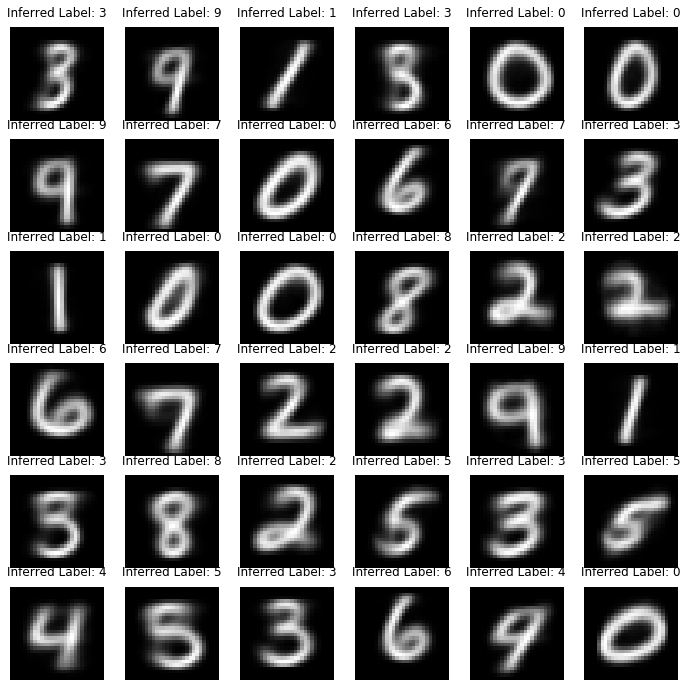

In [62]:
#Visualize cluster centroid

# initialize and fit the k_means algrithm
kmeans = MiniBatchKMeans(n_clusters = 36)
kmeans.fit(X)

# Record centroid values
centroids = kmeans.cluster_centers_

# Reshape centroids into image
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# Determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, Y)

# Create a figure with subplot
fig, axs = plt.subplots(6, 6, figsize = (12, 12))
plt.gray()

# Loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    for key,value in cluster_labels.items():
        if i in value:
            ax.set_title("Inferred Label: {}".format(key))
            
    
    ax.matshow(images[i])
    ax.axis('off')
    
# display figure
fig.show()